In [17]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader, TensorDataset

np.random.seed(42)

In [2]:
def f(x, c):
    return torch.cosh(c*x)

def f_grad(x, c):
    return c*torch.sinh(c*x)

def f_hess(x, c):
    return c**2 * torch.cosh(c*x)

def newton(eta = 1, c = torch.tensor(0.5), num_epochs = 10):
    x = torch.tensor(10.0, requires_grad = True)
    results = [x.item()]

    for i in range(num_epochs):
        x = x - eta*f_grad(x,c)/f_hess(x,c)
        results.append(x.item())
        print(f'epoch {i+1}, x: ',x)

    
    return results

In [3]:
def show_trace(results):
    # Prepare data for plotting the function cosh(cx)
    x_vals = np.linspace(-10, 10, 500)  # X-axis values
    y_vals = np.cosh(c.item() * x_vals)  # Corresponding Y-axis values
    
    # Extract the y-values of cosh(cx) for the points found by Newton's method
    newton_y_vals = [np.cosh(c.item() * x) for x in results]
    
    # Plot the curve and Newton's method results
    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_vals, label=r'$\cosh(c \cdot x)$', color='teal', linewidth=2)
    plt.scatter(results, newton_y_vals, color='red', label='Newton\'s Method Steps', zorder=5)
    plt.plot(results, newton_y_vals, color='red', linestyle='-', alpha=0.7)
    plt.xlabel('x', fontsize=12)
    plt.ylabel(r'$\cosh(c \cdot x)$', fontsize=12)
    plt.title('Convergence of Newton\'s Method on $\cosh(c \cdot x)$', fontsize=14)
    plt.legend(fontsize=10)
    # plt.grid(True)
    plt.show()
    

epoch 1, x:  tensor(8.0002, grad_fn=<SubBackward0>)
epoch 2, x:  tensor(6.0015, grad_fn=<SubBackward0>)
epoch 3, x:  tensor(4.0114, grad_fn=<SubBackward0>)
epoch 4, x:  tensor(2.0825, grad_fn=<SubBackward0>)
epoch 5, x:  tensor(0.5258, grad_fn=<SubBackward0>)
epoch 6, x:  tensor(0.0118, grad_fn=<SubBackward0>)
epoch 7, x:  tensor(1.3690e-07, grad_fn=<SubBackward0>)
epoch 8, x:  tensor(0., grad_fn=<SubBackward0>)
epoch 9, x:  tensor(0., grad_fn=<SubBackward0>)
epoch 10, x:  tensor(0., grad_fn=<SubBackward0>)


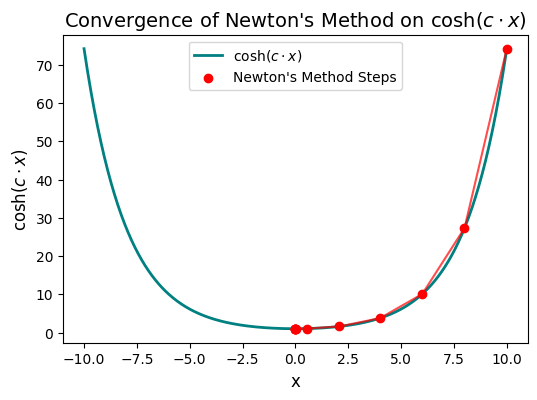

In [4]:
c = torch.tensor(0.5)
num_epochs = 10
show_trace(newton(eta = 1, c = c, num_epochs = 10))

# SGD

In [5]:
def f(x1,x2):
    return x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 2*x1 , 4*x2

def sgd (x1, x2, f_grad, eta = 0.1, lr_schedule = lambda : 1):
    g1,g2 = f_grad(x1,x2)
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item() 

    eta_t = eta * lr_schedule()
    x1 -= eta_t * g1
    x2 -= eta_t * g2

    return x1,x2
    

In [6]:
def plot_trajectory(f, trajectory, label = 'Trajectory', title = 'Trajectory', x = np.linspace(-6,1.5,100),y = np.linspace(-6,1.5,100)):
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    traj_x1,traj_x2 = zip(*trajectory)

    # Contour plot
    plt.figure(figsize = (6,4))
    plt.contour(X,Y,Z, levels = 10, colors = 'teal')
    plt.plot(traj_x1,traj_x2,'-o', color = 'red', label = label, zorder = 2)
    plt.scatter(traj_x1[0], traj_x2[0], color='green', label='Start', zorder = 3)
    plt.scatter(traj_x1[-1], traj_x2[-1], color='blue', label='End', zorder = 3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

Epoch 100, x1: -0.6180674793603822, x2: -0.09352347342945103



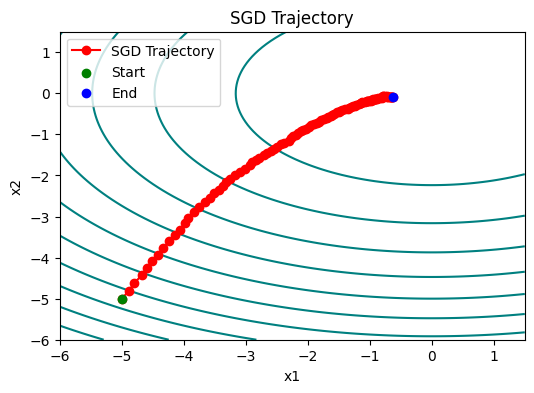

In [7]:
x1, x2 = -5, -5
eta = 0.01
lr_schedule = lambda : 1 # constant learning rate

steps = 100
trajectory = [(x1,x2)]

for _ in range(steps):
    x1,x2 = sgd(x1,x2, f_grad, eta, lr_schedule)
    trajectory.append((x1,x2))

print(f"Epoch {steps}, x1: {x1}, x2: {x2}\n")

plot_trajectory(f, trajectory, label = 'SGD Trajectory', title = 'SGD Trajectory')

Epoch 100, x1: -4.191636016386018, x2: -3.5017966717950646



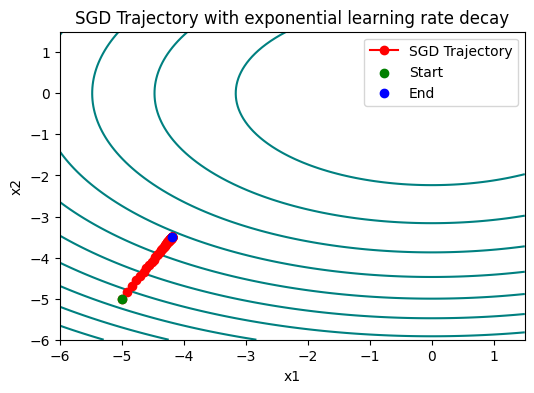

In [8]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return np.exp(-0.1 * t)

t = 1
lr_schedule = exponential_lr

x1, x2 = -5, -5
eta = 0.01
steps = 100
trajectory = [(x1,x2)]

for _ in range(steps):
    x1,x2 = sgd(x1,x2, f_grad, eta, lr_schedule)
    trajectory.append((x1,x2))

print(f"Epoch {steps}, x1: {x1}, x2: {x2}\n")
plot_trajectory(f, trajectory, label = 'SGD Trajectory', title = 'SGD Trajectory with exponential learning rate decay')

Epoch 100, x1: -2.021378337010518, x2: -0.8187051884407972



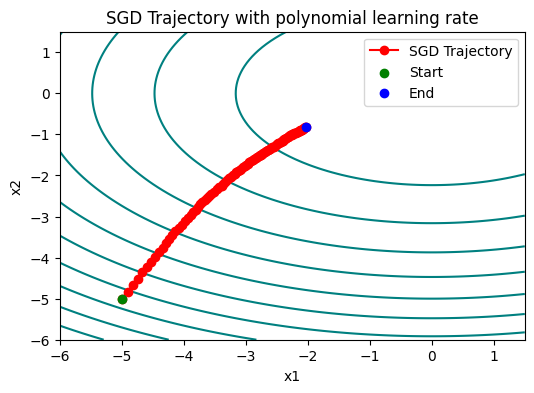

In [9]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)


t = 1
lr_schedule = polynomial_lr

x1, x2 = -5, -5
eta = 0.01
steps = 100
trajectory = [(x1,x2)]

for _ in range(steps):
    x1,x2 = sgd(x1,x2, f_grad, eta, lr_schedule)
    trajectory.append((x1,x2))

print(f"Epoch {steps}, x1: {x1}, x2: {x2}\n")
plot_trajectory(f, trajectory, label = 'SGD Trajectory', title = 'SGD Trajectory with polynomial learning rate')

# MiniBatch SGD

In [10]:
def get_data(batch_size = 10, n = 1500):
    
    data = np.genfromtxt(data_path, dtype = np.float32, delimiter= '\t' )
    data = (data-(np.mean(data, axis = 0)))/np.std(data, axis = 0) # Whitening

    features = torch.tensor(data[:n,:-1], dtype = torch.float32)
    labels = torch.tensor(data[:n,-1], dtype = torch.float32).unsqueeze(1)

    dataset = TensorDataset(features, labels)
    data_iter = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    return data_iter, features.shape[1]
        

In [11]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def evaluate_loss(net, data_iter, loss_fn):
    total_loss, count = 0,0
    for X,y in data_iter:
        y_hat = net(X)
        total_loss += loss_fn(y_hat,y).sum().item()
        count += y.numel()
    return total_loss / count

In [12]:
def train_model(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epcohs = 10):
    w = torch.normal(mean = 0.0, std = 0.01, size = (feature_dim, 1), requires_grad = True)
    b = torch.zeros((1,), requires_grad = True)
    net = lambda X: linreg(X,w,b)

    losses = []
    n = 0
    for epoch in range(num_epochs):
        for X,y in data_iter:
            l = squared_loss(net(X), y).mean()
            l.backward()
            trainer_fn([w,b], states, hyperparams)
            n += X.shape[0]

            if n%200 == 0:
                epoch_loss = evaluate_loss(net, data_iter, squared_loss)
                losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {evaluate_loss(net, data_iter, squared_loss):.4f}")
        
    return losses

   

In [13]:
def loss_plot(losses, label = "Loss", title = "Training Loss Over Time"):
    # Plot Loss
    plt.plot(range(1, len(losses) + 1), losses, label=label, color = 'teal')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(title)
    plt.show()

In [14]:
def sgd_model(params, state, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [15]:
data_path = 'airfoil_self_noise.dat'
data_iter, feature_dim = get_data(batch_size = 32, n = 1500)
print(f"Number of Features : {feature_dim} ")

Number of Features : 5 


Epoch 1, Loss: 0.3788
Epoch 2, Loss: 0.3171
Epoch 3, Loss: 0.2840
Epoch 4, Loss: 0.2659
Epoch 5, Loss: 0.2563
Epoch 6, Loss: 0.2510
Epoch 7, Loss: 0.2478
Epoch 8, Loss: 0.2459
Epoch 9, Loss: 0.2448
Epoch 10, Loss: 0.2441


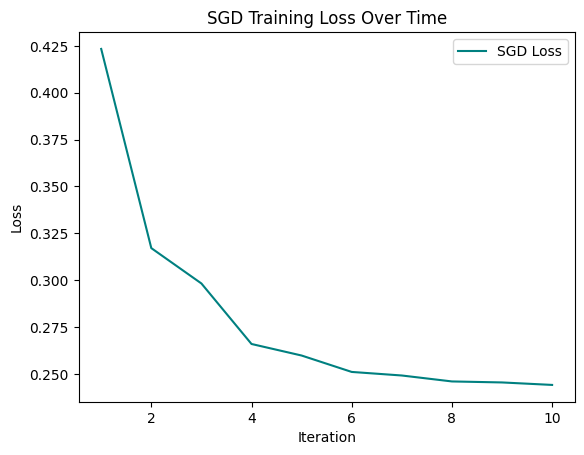

In [16]:
num_epochs = 10
lr = 0.01
losses = train_model(sgd_model, None, {'lr': lr}, data_iter, feature_dim, num_epochs)
loss_plot(losses, label = "SGD Loss", title = "SGD Training Loss Over Time")

Epoch 100, x1: -2.021378337010518, x2: -0.8187051884407972



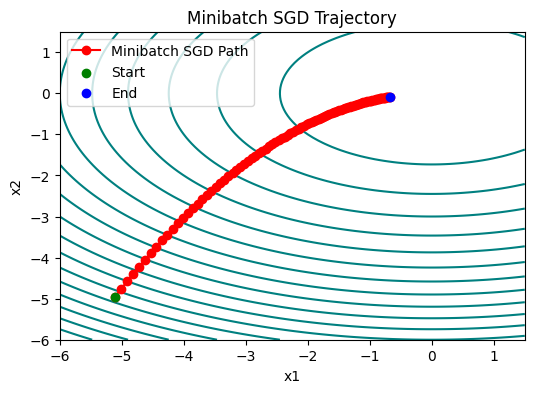

In [18]:
def f(x1,x2):
    return x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 2*x1 , 4*x2

# Minibatch gradient calculation for a batch of points
def f_grad_batch(X_batch):
    grads = np.zeros_like(X_batch)
    for i in range(X_batch.shape[0]):
        x1, x2 = X_batch[i]
        g1, g2 = f_grad(x1, x2)
        # Add small Gaussian noise
        g1 += np.random.normal(0.0, 0.1)  # Reduced noise variance
        g2 += np.random.normal(0.0, 0.1)
        grads[i] = [g1, g2]
    return grads


# Minibatch SGD function
def minibatch_sgd(X, batch_size, eta=0.1, num_epochs=10):
    n_samples = X.shape[0]
    trajectory = []  # Track the optimization path
    # x1, x2 = -5,-5  # Start at the mean of the data
    x = X.mean(axis = 0)
    x1,x2 = x[0], x[1]
    trajectory.append((x1, x2))

    for epoch in range(num_epochs):
        # Shuffle data
        np.random.shuffle(X)
        for i in range(0, n_samples, batch_size):
            # Minibatch
            X_batch = X[i:i + batch_size]
            # Compute average gradient for the batch
            grads = f_grad_batch(X_batch)
            avg_grad = grads.mean(axis=0)
            # Gradient update
            X[i:i + batch_size, 0] -= eta * avg_grad[0]
            X[i:i + batch_size, 1] -= eta * avg_grad[1]
            x = X.mean(axis = 0)
            x1,x2 = x[0], x[1]
            # Track trajectory
        trajectory.append((x1, x2))

    return trajectory

# Plot trajectory on contour
def plot_trajectory(f, trajectory, label='Trajectory', title='Minibatch SGD Trajectory'):
    x = np.linspace(-6, 1.5, 100)
    y = np.linspace(-6, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    traj_x1, traj_x2 = zip(*trajectory)

    # Contour plot
    plt.figure(figsize=(6, 4))
    plt.contour(X, Y, Z, levels=20, colors='teal')
    plt.plot(traj_x1, traj_x2, '-o', color='red', label=label, zorder = 2)
    plt.scatter(traj_x1[0], traj_x2[0], color='green', label='Start', zorder = 3)
    plt.scatter(traj_x1[-1], traj_x2[-1], color='blue', label='End', zorder = 3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution
# data = np.random.uniform(-5, -5, size=(100, 2))  # 100 samples, 2 dimensions


# Define mean and covariance
mean = [-5, -5]  # Mean of x1 and x2
covariance = [[1, 0], [0, 1]]  # Identity covariance matrix (no correlation)
# Generate 100 points from a multivariate normal distribution
data = np.random.multivariate_normal(mean, covariance, 100)

# Minibatch SGD
trajectory = minibatch_sgd(data, batch_size=10, eta=0.01, num_epochs=100)
print(f"Epoch {steps}, x1: {x1}, x2: {x2}\n")

# Plot trajectory
plot_trajectory(f, trajectory, label='Minibatch SGD Path')


# Momentum

In [19]:
def f_momentum(x1,x2):
    return 0.1 * x1 ** 2 +  2 * x2 ** 2
    
def f_grad_momentum(x1,x2):
    return 0.2*x1 , 4*x2


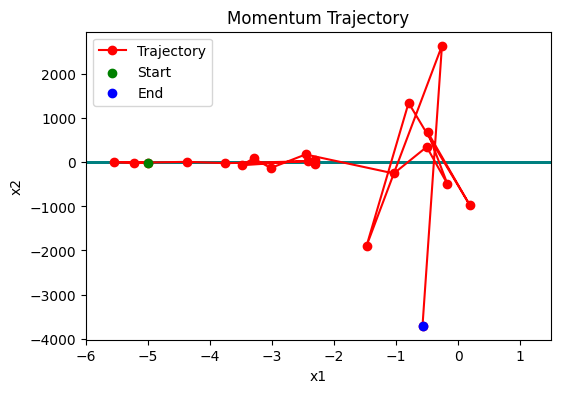

In [20]:
# SGD Saddling
x1,x2 = -5,-5
num_epochs = 20
eta = 0.6
lr_schedule = lambda : 1 # constant learning rate
trajectory = []
trajectory.append((x1,x2))

for _ in range(num_epochs):
    x1,x2 = sgd(x1,x2, f_grad_momentum, eta, lr_schedule)
    trajectory.append((x1,x2))
# Plot trajectory
plot_trajectory(f_momentum, trajectory, title="Momentum Trajectory")


Epoch 20, x1: -0.3788799022126919, x2: -1.4764560660299137



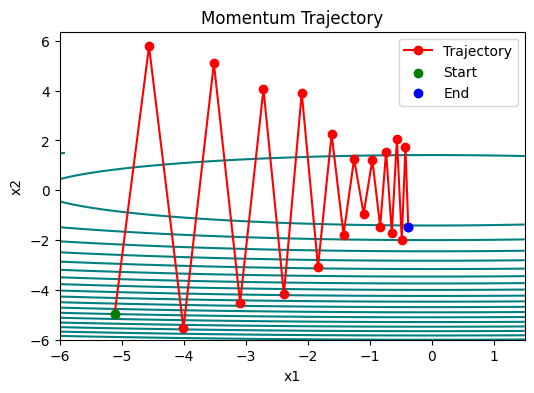

In [31]:
def f(x1,x2):
    return 0.1*x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 0.2*x1 , 4*x2

# Minibatch gradient calculation for a batch of points
def f_grad_batch(X_batch):
    grads = np.zeros_like(X_batch)
    for i in range(X_batch.shape[0]):
        x1, x2 = X_batch[i]
        g1, g2 = f_grad(x1, x2)
        # Add small Gaussian noise
        g1 += np.random.normal(0.0, 0.1)  # Reduced noise variance
        g2 += np.random.normal(0.0, 0.1)
        
        grads[i] = [g1, g2]
    return grads


# Minibatch SGD function
def momentum(X, batch_size, eta=0.1, num_epochs=10, beta = 0.25):
    n_samples = X.shape[0]
    trajectory = []  # Track the optimization path
    
    x = X.mean(axis = 0)
    x1,x2 = x[0], x[1]
    v1, v2 = 0,0
    trajectory.append((x1, x2))

    for epoch in range(num_epochs):
        # Shuffle data
        np.random.shuffle(X)
        for i in range(0, n_samples, batch_size):
            # Minibatch
            X_batch = X[i:i + batch_size]
            # Compute average gradient for the batch
            grads = f_grad_batch(X_batch)
            avg_grad = grads.mean(axis=0)
            v1 = beta * v1 + (1-beta)*avg_grad[0]
            v2 = beta * v2 + (1-beta)*avg_grad[1]
        
            # Gradient update
            X[i:i + batch_size, 0] -= eta * v1
            X[i:i + batch_size, 1] -= eta * v2
            x = X.mean(axis = 0)
            x1,x2 = x[0], x[1]
            # Track trajectory
        trajectory.append((x1, x2))

    return trajectory



# Main execution
# Generate random data points
np.random.seed(42)


# Define mean and covariance
mean = [-5, -5]  # Mean of x1 and x2
covariance = [[1, 0], [0, 1]]  # Identity covariance matrix (no correlation)
# Generate 100 points from a multivariate normal distribution
data = np.random.multivariate_normal(mean, covariance, 100)

# data = np.random.uniform(-5, -4, size=(100, 2))  # 100 samples, 2 dimensions

# Minibatch SGD
trajectory = momentum(data, batch_size=10, eta=0.6, num_epochs=20, beta = 0.5)
print(f"Epoch {num_epochs}, x1: {trajectory[-1][0]}, x2: {trajectory[-1][1]}\n")

# Plot trajectory
plot_trajectory(f, trajectory, title='Momentum Trajectory')


# Adagrad

Epoch 20, x1: -4.089786932537947, x2: -1.0372159792674989



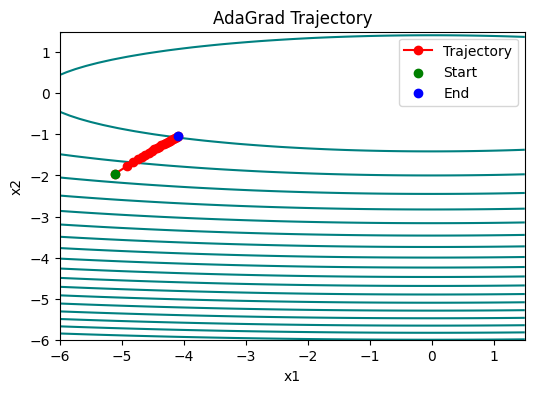

In [32]:
def f(x1,x2):
    return 0.1*x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 0.2*x1 , 4*x2

# Minibatch gradient calculation for a batch of points
def f_grad_batch(X_batch):
    grads = np.zeros_like(X_batch)
    for i in range(X_batch.shape[0]):
        x1, x2 = X_batch[i]
        g1, g2 = f_grad(x1, x2)
        # Add small Gaussian noise
        # g1 += np.random.normal(0.0, 0.1)  # Reduced noise variance
        # g2 += np.random.normal(0.0, 0.1)
        
        grads[i] = [g1, g2]
    return grads


# Minibatch SGD function
def adagrad(X, batch_size, eta=0.1, num_epochs=10):
    n_samples = X.shape[0]
    trajectory = []  # Track the optimization path
    
    x = X.mean(axis = 0)
    x1,x2 = x[0], x[1]
    s1, s2 = 0,0
    eps = 1e-6
    trajectory.append((x1, x2))

    for epoch in range(num_epochs):
        # Shuffle data
        np.random.shuffle(X)
        for i in range(0, n_samples, batch_size):
            # Minibatch
            X_batch = X[i:i + batch_size]
            # Compute average gradient for the batch
            grads = f_grad_batch(X_batch)
            avg_grad = grads.mean(axis=0)
            g1 = avg_grad[0]
            g2 = avg_grad[1]
            s1 += g1**2
            s2 += g2**2
        
            # Gradient update
            X[i:i + batch_size, 0] -= eta / np.sqrt(s1 + eps) * g1
            X[i:i + batch_size, 1] -= eta / np.sqrt(s2 + eps) * g2
            x = X.mean(axis = 0)
            x1,x2 = x[0], x[1]
            # Track trajectory
        trajectory.append((x1, x2))

    return trajectory



# Main execution
# Generate random data points
np.random.seed(42)


# Define mean and covariance
mean = [-5, -2]  # Mean of x1 and x2
covariance = [[1, 0], [0, 1]]  # Identity covariance matrix (no correlation)
# Generate 100 points from a multivariate normal distribution
data = np.random.multivariate_normal(mean, covariance, 100)

# data = np.random.uniform(-5, -4, size=(100, 2))  # 100 samples, 2 dimensions

# Minibatch SGD
trajectory = adagrad(data, batch_size=10, eta=0.4 , num_epochs=20)
print(f"Epoch {num_epochs}, x1: {trajectory[-1][0]}, x2: {trajectory[-1][1]}\n")

# Plot trajectory
plot_trajectory(f, trajectory, title='AdaGrad Trajectory')


# RMSProp

Epoch 20, x1: -0.013537542566682121, x2: -0.044315310048966924



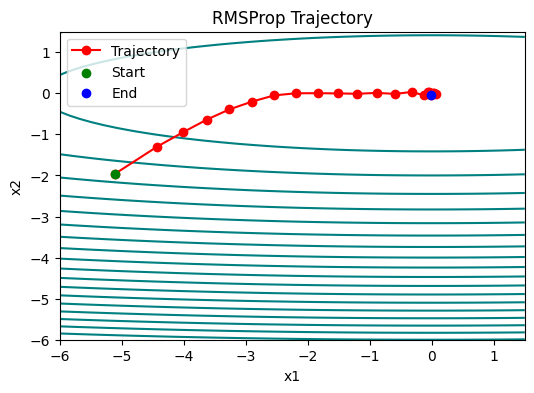

In [29]:
def f(x1,x2):
    return 0.1*x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 0.2*x1 , 4*x2

# Minibatch gradient calculation for a batch of points
def f_grad_batch(X_batch):
    grads = np.zeros_like(X_batch)
    for i in range(X_batch.shape[0]):
        x1, x2 = X_batch[i]
        g1, g2 = f_grad(x1, x2)
        # Add small Gaussian noise
        g1 += np.random.normal(0.0, 0.1)  # Reduced noise variance
        g2 += np.random.normal(0.0, 0.1)
        
        grads[i] = [g1, g2]
    return grads


# Minibatch SGD function
def rmsprop(X, batch_size, eta=0.1, num_epochs=10, gamma = 0.9):
    n_samples = X.shape[0]
    trajectory = []  # Track the optimization path
    
    x = X.mean(axis = 0)
    x1,x2 = x[0], x[1]
    s1, s2 = 0,0
    eps = 1e-6
    trajectory.append((x1, x2))

    for epoch in range(num_epochs):
        # Shuffle data
        np.random.shuffle(X)
        for i in range(0, n_samples, batch_size):
            # Minibatch
            X_batch = X[i:i + batch_size]
            # Compute average gradient for the batch
            grads = f_grad_batch(X_batch)
            avg_grad = grads.mean(axis=0)
            g1 = avg_grad[0]
            g2 = avg_grad[1]
            s1 = gamma * s1 + (1-gamma) * g1**2
            s2 = gamma * s2 + (1-gamma) * g2**2
        
            # Gradient update
            # X[:,0] -= eta / np.sqrt(s1 + eps) * g1
            # X[:,1] -= eta / np.sqrt(s2 + eps) * g2
            X[i:i + batch_size, 0] -= eta / np.sqrt(s1 + eps) * g1
            X[i:i + batch_size, 1] -= eta / np.sqrt(s2 + eps) * g2
            x = X.mean(axis = 0)
            x1,x2 = x[0], x[1]
            # Track trajectory
        trajectory.append((x1, x2))

    return trajectory



# Main execution
# Generate random data points
np.random.seed(42)


# Define mean and covariance
mean = [-5, -2]  # Mean of x1 and x2
covariance = [[1, 0], [0, 1]]  # Identity covariance matrix (no correlation)
# Generate 100 points from a multivariate normal distribution
data = np.random.multivariate_normal(mean, covariance, 100)

# data = np.random.uniform(-5, -4, size=(100, 2))  # 100 samples, 2 dimensions

# Minibatch SGD
trajectory = rmsprop(data, batch_size=10, eta=0.4, num_epochs=20, gamma = 0.9)
print(f"Epoch {num_epochs}, x1: {trajectory[-1][0]}, x2: {trajectory[-1][1]}\n")

# Plot trajectory
plot_trajectory(f, trajectory, title='RMSProp Trajectory')


# Adam

Epoch 20, x1: -0.3105289871981757, x2: -0.00959915920468838



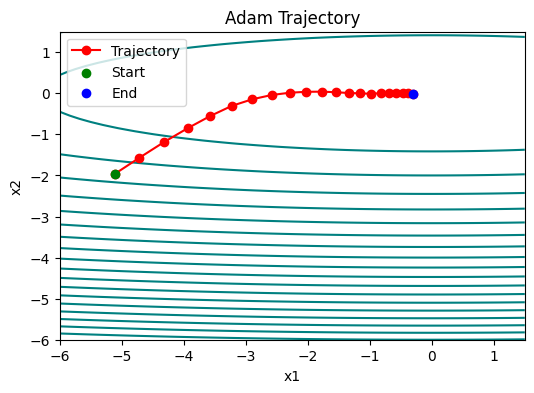

In [33]:
def f(x1,x2):
    return 0.1*x1**2 + 2*x2**2

def f_grad(x1,x2):
    return 0.2*x1 , 4*x2

# Minibatch gradient calculation for a batch of points
def f_grad_batch(X_batch):
    grads = np.zeros_like(X_batch)
    for i in range(X_batch.shape[0]):
        x1, x2 = X_batch[i]
        g1, g2 = f_grad(x1, x2)
        # Add small Gaussian noise
        g1 += np.random.normal(0.0, 0.1)  # Reduced noise variance
        g2 += np.random.normal(0.0, 0.1)
        
        grads[i] = [g1, g2]
    return grads


# Minibatch SGD function
def adam(X, batch_size, eta=0.1, num_epochs=10, beta1 = 0.9, beta2 = 0.999):
    n_samples = X.shape[0]
    trajectory = []  # Track the optimization path
    
    x = X.mean(axis = 0)
    x1, x2 = x[0], x[1]
    v1, v2 = 0, 0
    s1, s2 = 0, 0
    eps = 1e-6
    t = 0 # time step for bias correction
    trajectory.append((x1, x2))

    for epoch in range(num_epochs):
        # Shuffle data
        np.random.shuffle(X)
        for i in range(0, n_samples, batch_size):
            t += 1
            # Minibatch
            X_batch = X[i:i + batch_size]
            # Compute average gradient for the batch
            grads = f_grad_batch(X_batch)
            avg_grad = grads.mean(axis=0)
            g1 = avg_grad[0]
            g2 = avg_grad[1]
            
            v1 = beta1 * v1 + (1-beta1) * g1
            v2 = beta1 * v2 + (1-beta1) * g2
            s1 = beta2 * s1 + (1-beta2) * g1**2
            s2 = beta2 * s2 + (1-beta2) * g2**2

            # Bias-corrected moments
            v1_corr = v1 / (1 - beta1**t)
            v2_corr = v2 / (1 - beta1**t)
            s1_corr = s1 / (1 - beta2**t)
            s2_corr = s2 / (1 - beta2**t)
        
            # Gradient update
            X[i:i + batch_size, 0] -= eta / (np.sqrt(s1_corr) + eps) * v1_corr
            X[i:i + batch_size, 1] -= eta / (np.sqrt(s2_corr) + eps) * v2_corr

            # Update trajectory
            x = X.mean(axis = 0)
            x1,x2 = x[0], x[1]
            # Track trajectory
        trajectory.append((x1, x2))

    return trajectory



# Main execution
# Generate random data points
np.random.seed(42)


# Define mean and covariance
mean = [-5, -2]  # Mean of x1 and x2
covariance = [[1, 0], [0, 1]]  # Identity covariance matrix (no correlation)
# Generate 100 points from a multivariate normal distribution
data = np.random.multivariate_normal(mean, covariance, 100)

# data = np.random.uniform(-5, -4, size=(100, 2))  # 100 samples, 2 dimensions

# Minibatch SGD
trajectory = adam(data, batch_size=10, eta=0.4, num_epochs=20, beta1 = 0.9, beta2 = 0.999)
print(f"Epoch {num_epochs}, x1: {trajectory[-1][0]}, x2: {trajectory[-1][1]}\n")

# Plot trajectory
plot_trajectory(f, trajectory, title='Adam Trajectory')
